## Iteration 7

### What is this about?
New Decoder - everything else is as we have always done

In [9]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_7"
model_dir = f'../../models/best_model_{iteration}.h5'

In [10]:
from keras.applications.mobilenet_v3 import preprocess_input
import sys
import os
sys.path.append(os.path.abspath("../.."))


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [3008,3008,3008,3008,3008,3008,3008]
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

Training set
Found 8202 images belonging to 7 classes (dist says 21056)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [11]:

from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [12]:
history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 2.5500 - accuracy: 0.1397
Epoch 1: val_loss improved from inf to 1.89908, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 171s 258ms/step - loss: 2.5500 - accuracy: 0.1397 - val_loss: 1.8991 - val_accuracy: 0.2703
Training set
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 2.2861 - accuracy: 0.1543
Epoch 2: val_loss improved from 1.89908 to 1.77208, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 167s 253ms/step - loss: 2.2861 - accuracy: 0.1543 - val_loss: 1.7721 - val_accuracy: 0.4282
Training set
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 2.1150 - accuracy: 0.1798
Epoch 3: val_loss improved from 1.77208 to 1.75604, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 166s 252ms/step - loss: 2.1150 - accuracy: 0.1798 - val_loss: 1.7560 - val_accuracy: 0.4404
Training set
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 2.0055 - accuracy: 0.2008
Epoch 4: val_loss improved from 1.75604 to 1.74353, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 179s 271ms/step - loss: 2.0055 - accuracy: 0.2008 - val_loss: 1.7

All layers have been unfrozen.
Epoch 1/5
658/658 [==============================] - 242s 365ms/step - loss: 2.0335 - accuracy: 0.2189 - val_loss: 1.6244 - val_accuracy: 0.5237
Training set
Epoch 2/5
658/658 [==============================] - 219s 331ms/step - loss: 1.6379 - accuracy: 0.3615 - val_loss: 1.0690 - val_accuracy: 0.6817
Training set
Epoch 3/5
658/658 [==============================] - 225s 341ms/step - loss: 1.3147 - accuracy: 0.4967 - val_loss: 0.8247 - val_accuracy: 0.7095
Training set
Epoch 4/5
658/658 [==============================] - 224s 340ms/step - loss: 1.1040 - accuracy: 0.5853 - val_loss: 0.7665 - val_accuracy: 0.7164
Training set
Epoch 5/5
658/658 [==============================] - 223s 339ms/step - loss: 0.9474 - accuracy: 0.6453 - val_loss: 0.8142 - val_accuracy: 0.6800
Training set


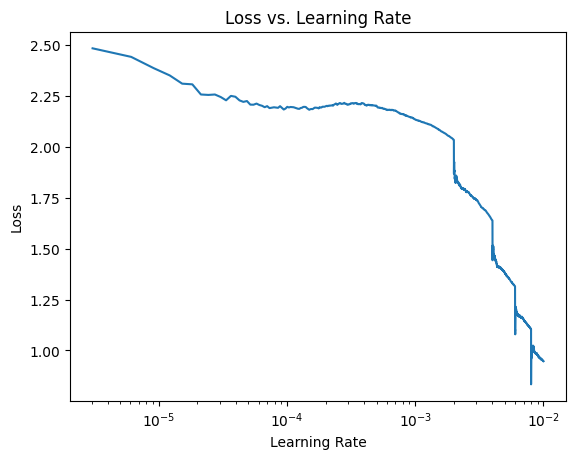

In [13]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, epochs=5)

In [14]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=40, checkpoint_path=model_dir, lr=[1e-3, 3e-2])
histories.append(history2)

Epoch 1/40
658/658 [==============================] - ETA: 0s - loss: 0.8684 - accuracy: 0.6759
Epoch 1: val_loss improved from inf to 0.70998, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 229s 348ms/step - loss: 0.8684 - accuracy: 0.6759 - val_loss: 0.7100 - val_accuracy: 0.7182
Training set
Epoch 2/40


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.6967
Epoch 2: val_loss did not improve from 0.70998
658/658 [==============================] - 226s 343ms/step - loss: 0.8239 - accuracy: 0.6967 - val_loss: 0.8555 - val_accuracy: 0.6395
Training set
Epoch 3/40
658/658 [==============================] - ETA: 0s - loss: 0.7675 - accuracy: 0.7195
Epoch 3: val_loss did not improve from 0.70998
658/658 [==============================] - 249s 378ms/step - loss: 0.7675 - accuracy: 0.7195 - val_loss: 0.7883 - val_accuracy: 0.6719
Training set
Epoch 4/40
658/658 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.7415
Epoch 4: val_loss improved from 0.70998 to 0.68504, saving model to ../../models/best_model_iteration_7.h5
658/658 [==============================] - 237s 361ms/step - loss: 0.7035 - accuracy: 0.7415 - val_loss: 0.6850 - val_accuracy: 0.7234
Training set
Epoch 5/40
658/658 [==============================] - ETA: 0s - loss: 0.6381 -

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6815806433688968
Accuracy on test set: 0.7662037014961243
F1 Score: 0.780834605426539


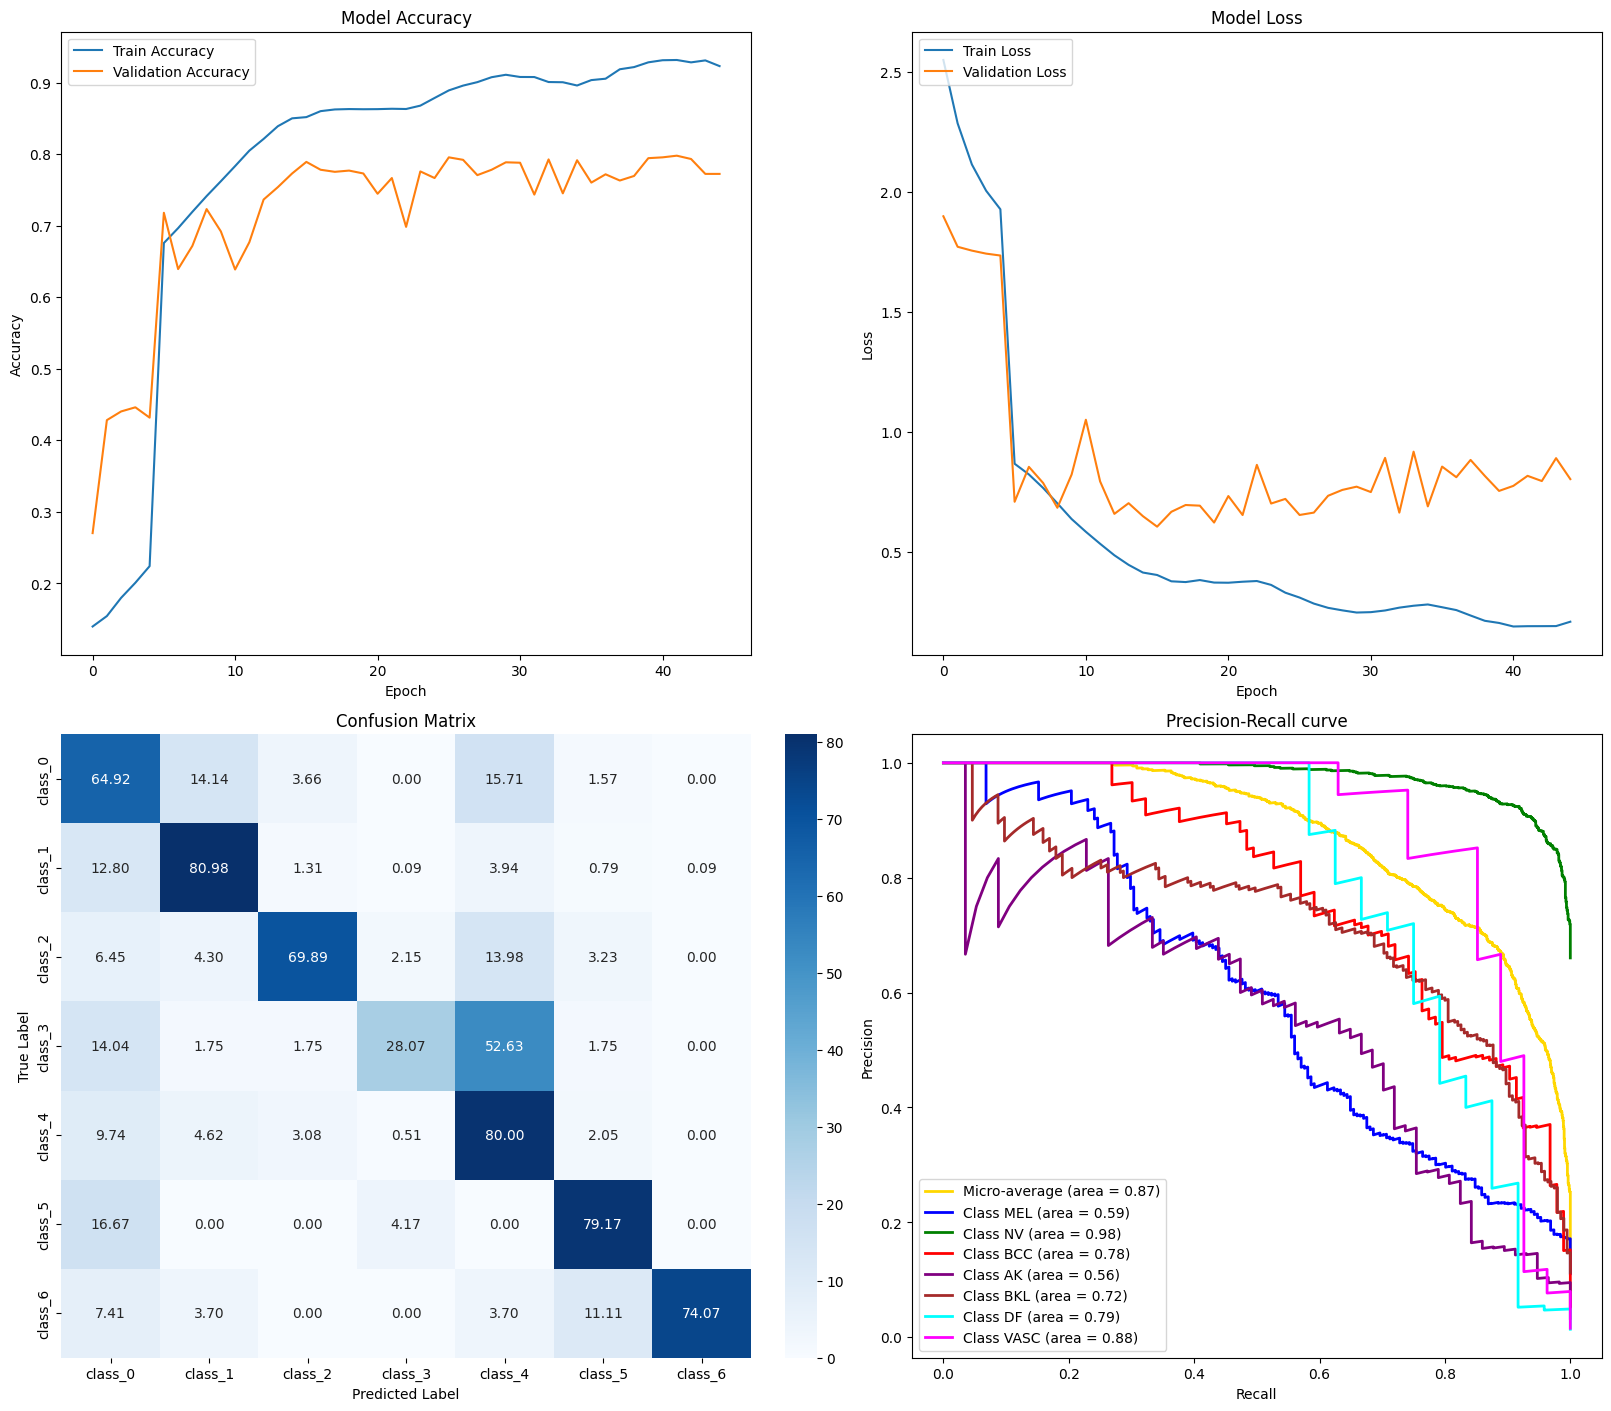

In [15]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

### What is this about???
Control the weight better i.e not unfreeze everything, let lr_find not change the weights, only unfreeze if platuea

In [13]:
data_dir = "../../Merge Set Ordered"
iteration = "iteration_7_2"
model_dir = f'../../models/best_model_{iteration}.h5'

In [14]:
from keras.applications.mobilenet_v3 import preprocess_input
import sys
import os
sys.path.append(os.path.abspath("../.."))


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory


batch_size=32
dist = [3008,3008,3008,3008,3008,3008,3008]
histories = []

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

Found 8202 images belonging to 7 classes (dist says 21056)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [15]:

from custom_model import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

All layers have been unfrozen.
Epoch 1/15
658/658 [==============================] - 236s 355ms/step - loss: 2.4119 - accuracy: 0.1545 - val_loss: 2.1916 - val_accuracy: 0.0561
Epoch 2/15
658/658 [==============================] - 217s 330ms/step - loss: 2.0391 - accuracy: 0.2079 - val_loss: 1.8257 - val_accuracy: 0.1997
Epoch 3/15
658/658 [==============================] - 229s 347ms/step - loss: 1.7767 - accuracy: 0.3011 - val_loss: 1.4654 - val_accuracy: 0.4537
Epoch 4/15
658/658 [==============================] - 258s 391ms/step - loss: 1.5474 - accuracy: 0.3963 - val_loss: 1.0734 - val_accuracy: 0.6209
Epoch 5/15
658/658 [==============================] - 247s 374ms/step - loss: 1.3275 - accuracy: 0.4877 - val_loss: 0.9079 - val_accuracy: 0.6719
Epoch 6/15
658/658 [==============================] - 227s 344ms/step - loss: 1.1878 - accuracy: 0.5486 - val_loss: 0.8108 - val_accuracy: 0.7014
Epoch 7/15
658/658 [==============================] - 221s 335ms/step - loss: 1.0588 - accura

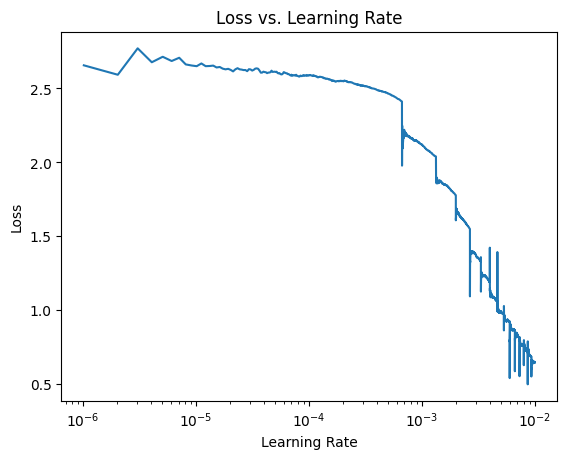

In [11]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, epochs=15)

In [12]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, epochs=15)

All layers have been unfrozen.
Epoch 1/15
658/658 [==============================] - 222s 333ms/step - loss: 0.6265 - accuracy: 0.7698 - val_loss: 0.7143 - val_accuracy: 0.7188
Epoch 2/15
658/658 [==============================] - 229s 348ms/step - loss: 0.6167 - accuracy: 0.7739 - val_loss: 0.7174 - val_accuracy: 0.7147
Epoch 3/15
658/658 [==============================] - 232s 351ms/step - loss: 0.6084 - accuracy: 0.7707 - val_loss: 0.6898 - val_accuracy: 0.7321
Epoch 4/15
658/658 [==============================] - 217s 329ms/step - loss: 0.5992 - accuracy: 0.7757 - val_loss: 0.7187 - val_accuracy: 0.7170
Epoch 5/15
658/658 [==============================] - 224s 339ms/step - loss: 0.5998 - accuracy: 0.7764 - val_loss: 0.7078 - val_accuracy: 0.7234
Epoch 6/15
658/658 [==============================] - 218s 331ms/step - loss: 0.5729 - accuracy: 0.7879 - val_loss: 0.6921 - val_accuracy: 0.7321
Epoch 7/15
 29/658 [>.............................] - ETA: 3:44 - loss: 0.5666 - accuracy: 0.

KeyboardInterrupt: 

In [5]:

history1 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history1)

Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 2.4260 - accuracy: 0.1542
Epoch 1: val_loss improved from inf to 1.86981, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 171s 258ms/step - loss: 2.4260 - accuracy: 0.1542 - val_loss: 1.8698 - val_accuracy: 0.2060
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 2.2193 - accuracy: 0.1678
Epoch 2: val_loss improved from 1.86981 to 1.85222, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 172s 261ms/step - loss: 2.2193 - accuracy: 0.1678 - val_loss: 1.8522 - val_accuracy: 0.2454
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 2.0821 - accuracy: 0.1933
Epoch 3: val_loss improved from 1.85222 to 1.81655, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 168s 255ms/step - loss: 2.0821 - accuracy: 0.1933 - val_loss: 1.8166 - val_accuracy: 0.2888
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 1.9758 - accuracy: 0.2159
Epoch 4: val_loss improved from 1.81655 to 1.81070, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 165s 250ms/step - loss: 1.9758 - accuracy: 0.2159 - val_loss: 1.8107 - val_accuracy: 

In [7]:
model.unfreeze()
history2 = model.fit_epochs(train_generator, validation_generator, epochs=10, lr=[1e-10,1e-5], checkpoint_path=model_dir)
histories.append(history2)

All layers have been unfrozen.
Epoch 1/10
658/658 [==============================] - ETA: 0s - loss: 1.8632 - accuracy: 0.2552
Epoch 1: val_loss improved from inf to 1.78202, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 169s 257ms/step - loss: 1.8632 - accuracy: 0.2552 - val_loss: 1.7820 - val_accuracy: 0.3206
Epoch 2/10
658/658 [==============================] - ETA: 0s - loss: 1.8609 - accuracy: 0.2560
Epoch 2: val_loss improved from 1.78202 to 1.78187, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 169s 257ms/step - loss: 1.8609 - accuracy: 0.2560 - val_loss: 1.7819 - val_accuracy: 0.3206
Epoch 3/10
168/658 [======>.......................] - ETA: 2:06 - loss: 1.8640 - accuracy: 0.2502

KeyboardInterrupt: 

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.34694676741054326
Accuracy on test set: 0.37442129850387573
F1 Score: 0.43334950061163574


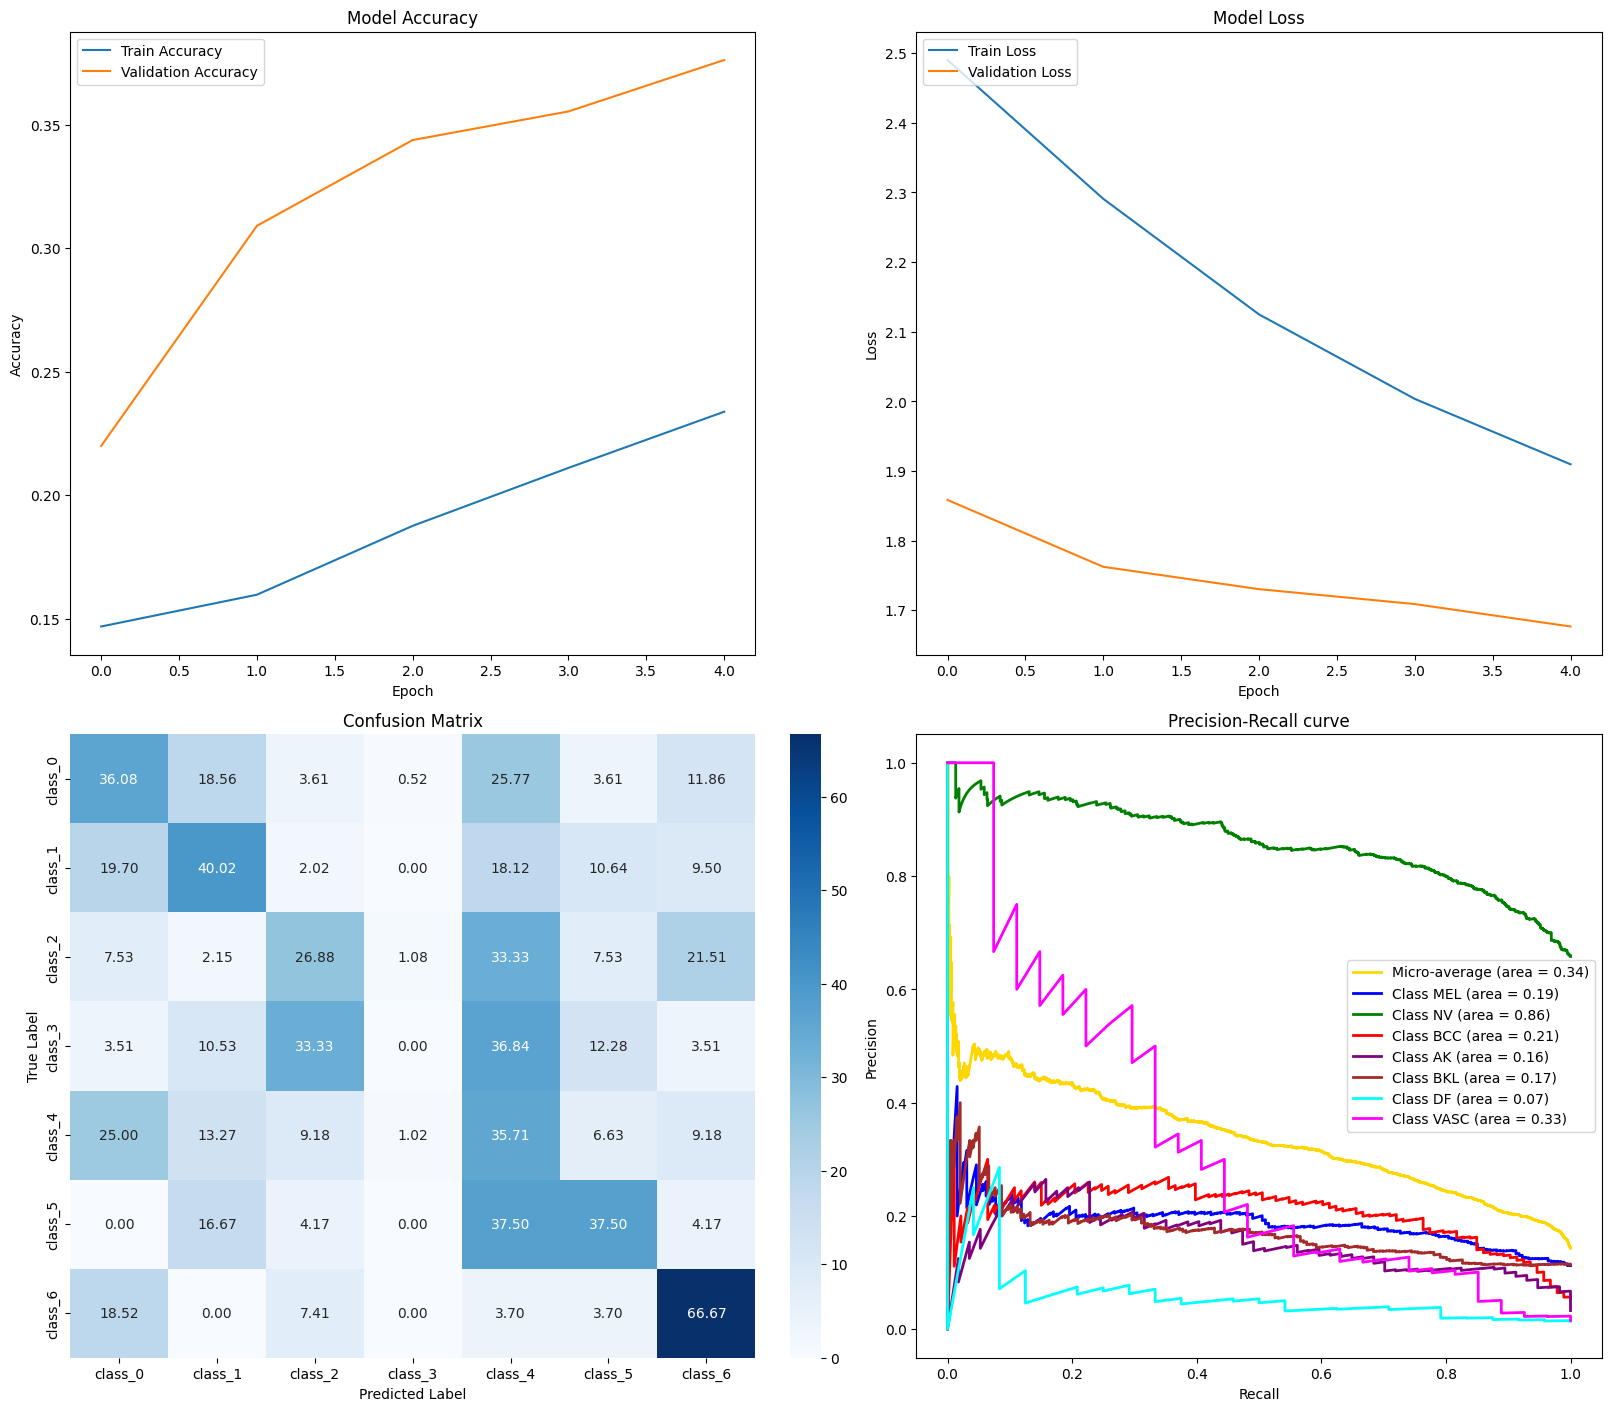

In [11]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

In [12]:
history2 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history2)

Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 1.8701 - accuracy: 0.2533
Epoch 1: val_loss improved from inf to 1.67155, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 166s 253ms/step - loss: 1.8701 - accuracy: 0.2533 - val_loss: 1.6716 - val_accuracy: 0.3814
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 1.8555 - accuracy: 0.2594
Epoch 2: val_loss improved from 1.67155 to 1.66341, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 250ms/step - loss: 1.8555 - accuracy: 0.2594 - val_loss: 1.6634 - val_accuracy: 0.3837
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 1.8291 - accuracy: 0.2717
Epoch 3: val_loss improved from 1.66341 to 1.63580, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 249ms/step - loss: 1.8291 - accuracy: 0.2717 - val_loss: 1.6358 - val_accuracy: 0.4045
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 1.8052 - accuracy: 0.2782
Epoch 4: val_loss improved from 1.63580 to 1.61909, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 249ms/step - loss: 1.8052 - accuracy: 0.2782 - val_loss: 1.6191 - val_accuracy: 

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.39797690944437064
Accuracy on test set: 0.40625
F1 Score: 0.4704361657305515


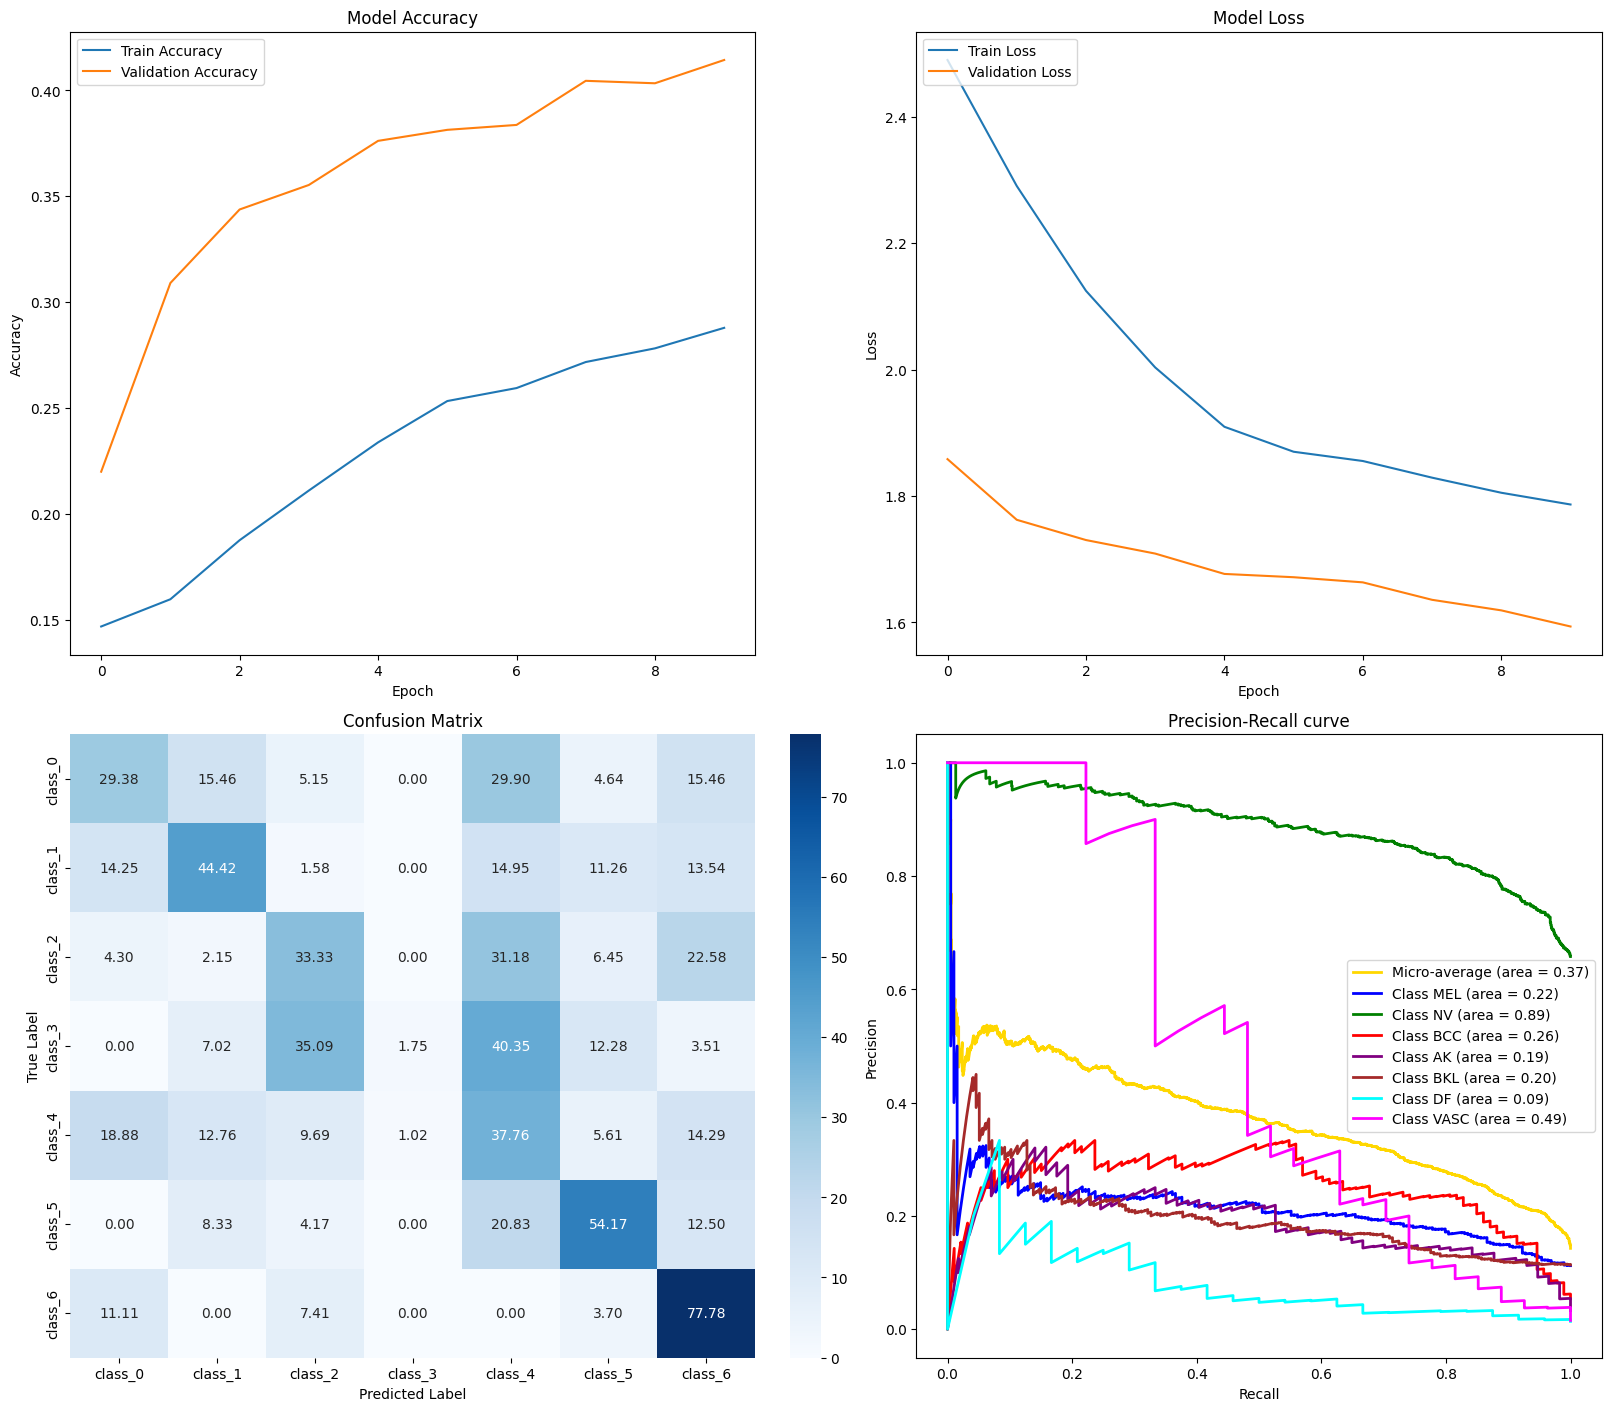

In [13]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

In [14]:
history3 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history3)

Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 1.7602 - accuracy: 0.3013
Epoch 1: val_loss improved from inf to 1.58863, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 168s 255ms/step - loss: 1.7602 - accuracy: 0.3013 - val_loss: 1.5886 - val_accuracy: 0.4161
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 1.7536 - accuracy: 0.3044
Epoch 2: val_loss improved from 1.58863 to 1.57587, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 165s 251ms/step - loss: 1.7536 - accuracy: 0.3044 - val_loss: 1.5759 - val_accuracy: 0.4225
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 1.7393 - accuracy: 0.3053
Epoch 3: val_loss improved from 1.57587 to 1.55855, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 165s 250ms/step - loss: 1.7393 - accuracy: 0.3053 - val_loss: 1.5586 - val_accuracy: 0.4259
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 1.7327 - accuracy: 0.3134
Epoch 4: val_loss improved from 1.55855 to 1.52984, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 249ms/step - loss: 1.7327 - accuracy: 0.3134 - val_loss: 1.5298 - val_accuracy: 

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.4289550088780864
Accuracy on test set: 0.4427083432674408
F1 Score: 0.5089530500330147


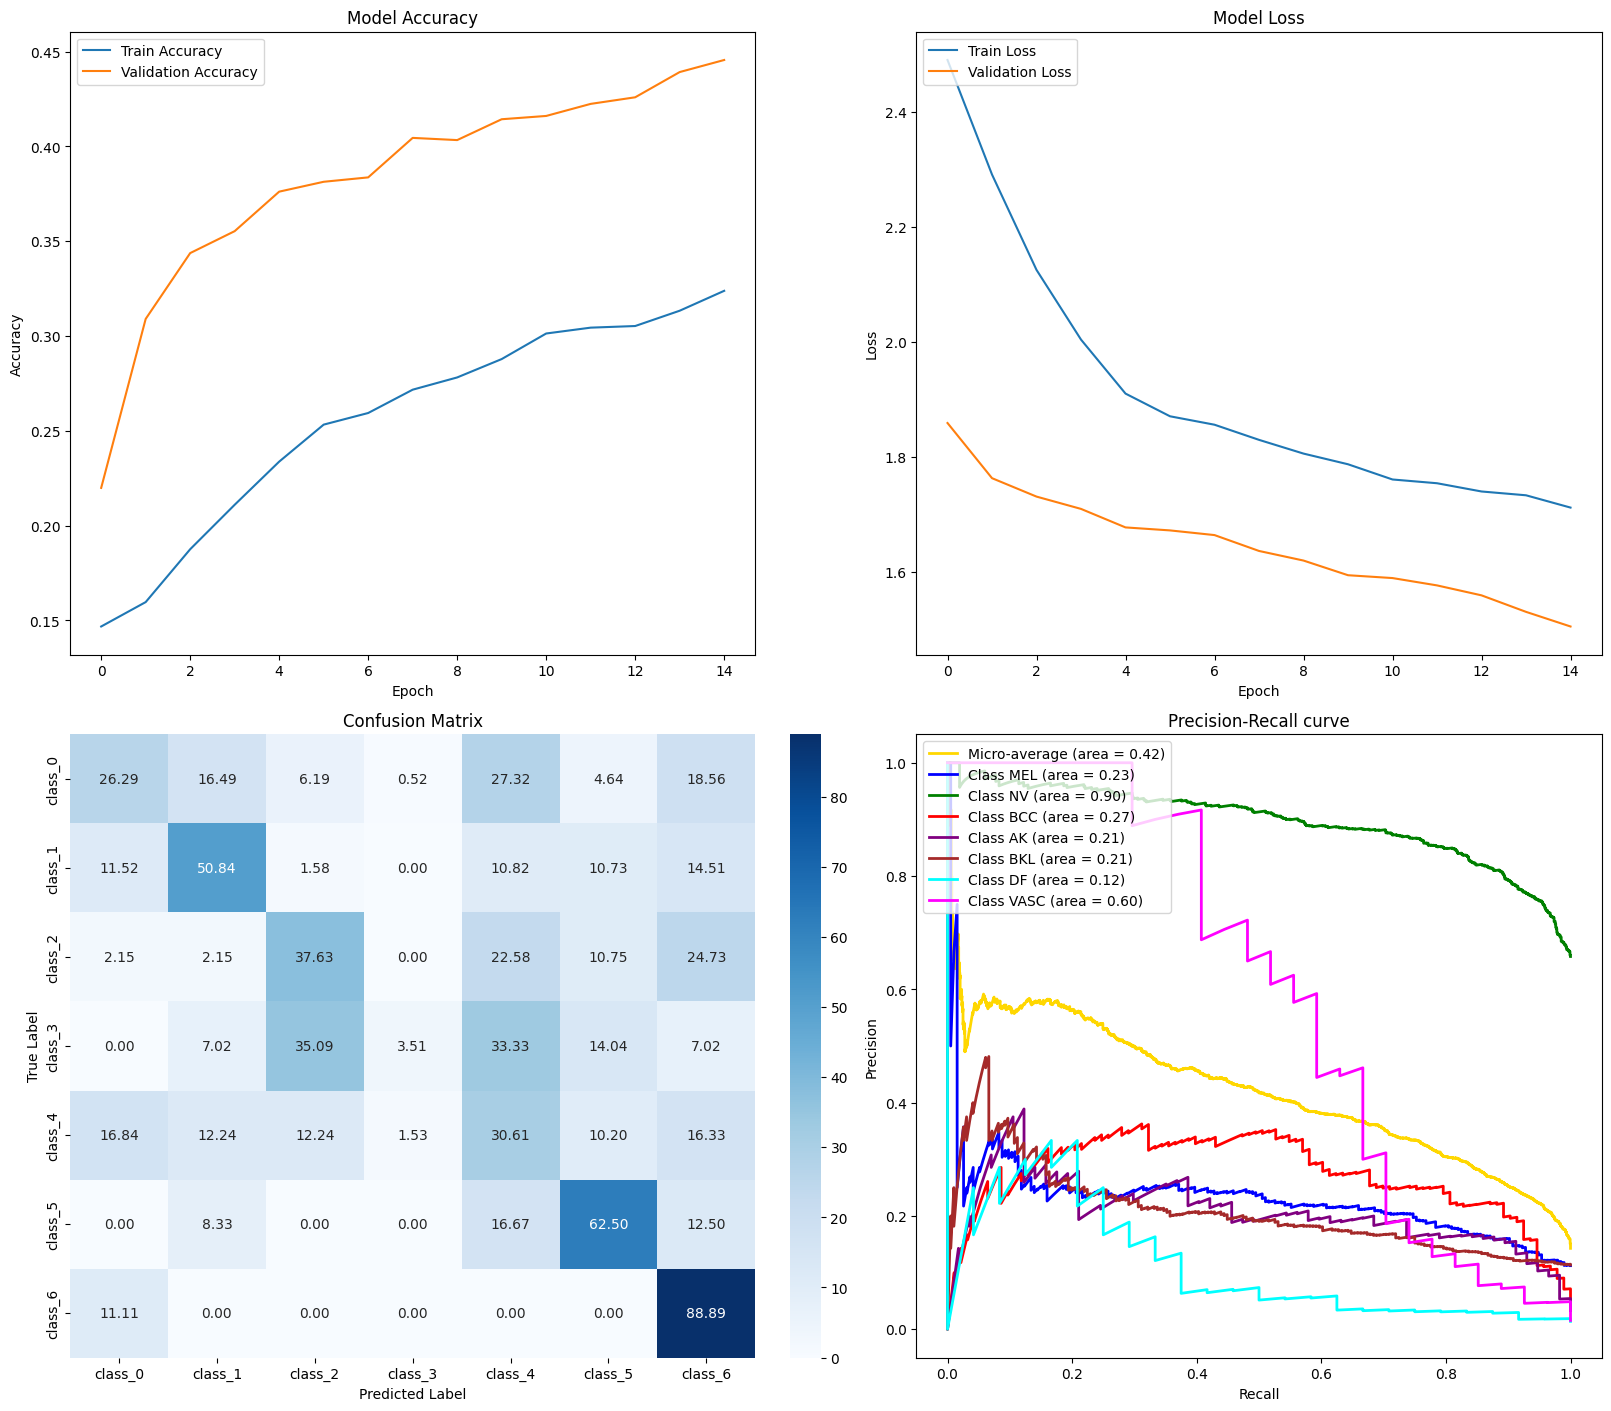

In [15]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

In [16]:
history4 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir)
histories.append(history4)

Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 1.6923 - accuracy: 0.3321
Epoch 1: val_loss improved from inf to 1.50203, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 163s 247ms/step - loss: 1.6923 - accuracy: 0.3321 - val_loss: 1.5020 - val_accuracy: 0.4479
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 1.6882 - accuracy: 0.3308
Epoch 2: val_loss improved from 1.50203 to 1.49348, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 163s 247ms/step - loss: 1.6882 - accuracy: 0.3308 - val_loss: 1.4935 - val_accuracy: 0.4508
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 1.6878 - accuracy: 0.3333
Epoch 3: val_loss improved from 1.49348 to 1.47345, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 163s 248ms/step - loss: 1.6878 - accuracy: 0.3333 - val_loss: 1.4735 - val_accuracy: 0.4647
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 1.6702 - accuracy: 0.3411
Epoch 4: val_loss improved from 1.47345 to 1.45904, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 249ms/step - loss: 1.6702 - accuracy: 0.3411 - val_loss: 1.4590 - val_accuracy: 

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.43698548581952584
Accuracy on test set: 0.45717594027519226
F1 Score: 0.5229548438837018


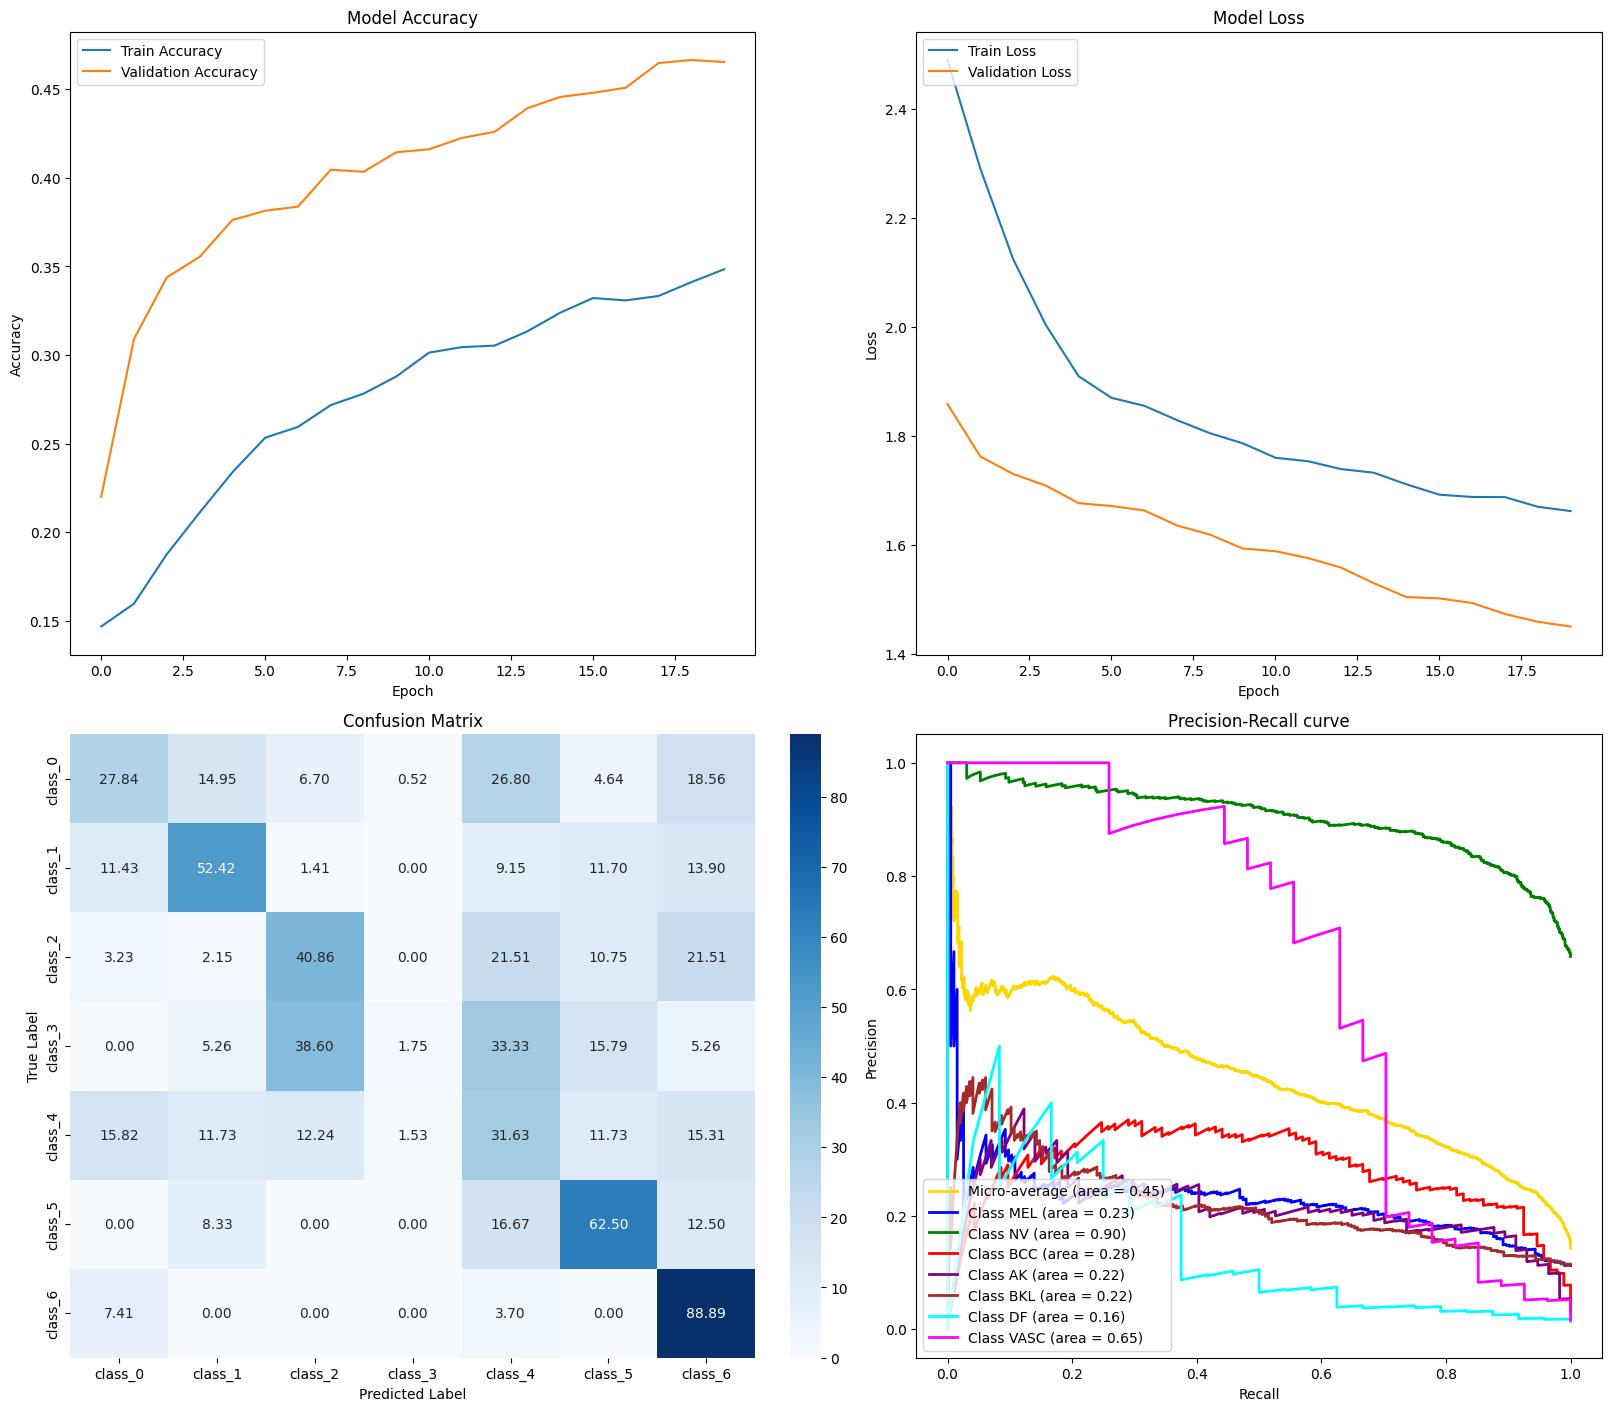

In [17]:
from tensorflow.keras.models import load_model
from plot_utils import show_all_plots

m = load_model(model_dir)
show_all_plots(histories, m, test_generator)

Last 10 layers have been unfrozen.
Epoch 1/5
658/658 [==============================] - 169s 254ms/step - loss: 1.7472 - accuracy: 0.3312 - val_loss: 1.3975 - val_accuracy: 0.5226
Epoch 2/5
658/658 [==============================] - 170s 258ms/step - loss: 1.6390 - accuracy: 0.3684 - val_loss: 1.3157 - val_accuracy: 0.5532
Epoch 3/5
658/658 [==============================] - 168s 254ms/step - loss: 1.5687 - accuracy: 0.3908 - val_loss: 1.2432 - val_accuracy: 0.5764
Epoch 4/5
658/658 [==============================] - 165s 251ms/step - loss: 1.5011 - accuracy: 0.4215 - val_loss: 1.1871 - val_accuracy: 0.5833
Epoch 5/5
658/658 [==============================] - 165s 250ms/step - loss: 1.4583 - accuracy: 0.4416 - val_loss: 1.1393 - val_accuracy: 0.5938


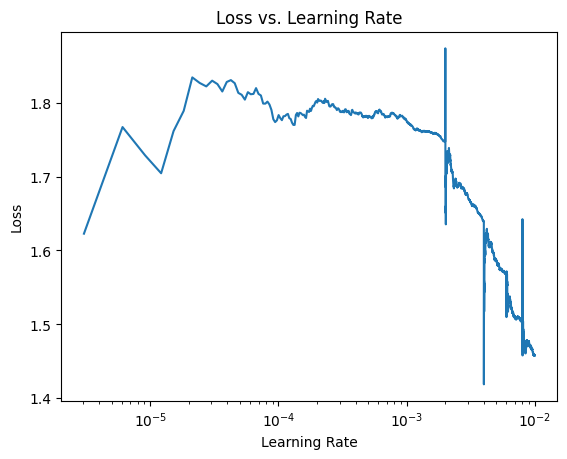

In [18]:
model.unfreeze(number_of_layers_to_unfreeze=10)
model.lr_find(train_generator, validation_generator, epochs=5,changes_weights=False)

In [19]:
weights = model.get_weights()
history5 = model.fit_epochs(train_generator, validation_generator, epochs=40, checkpoint_path=model_dir, lr=[1e-3, 1e-2])
histories.append(history5)

Epoch 1/40
658/658 [==============================] - ETA: 0s - loss: 1.7046 - accuracy: 0.3457
Epoch 1: val_loss improved from inf to 1.36107, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 249ms/step - loss: 1.7046 - accuracy: 0.3457 - val_loss: 1.3611 - val_accuracy: 0.5417
Epoch 2/40


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 1.6259 - accuracy: 0.3701
Epoch 2: val_loss improved from 1.36107 to 1.32053, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 164s 248ms/step - loss: 1.6259 - accuracy: 0.3701 - val_loss: 1.3205 - val_accuracy: 0.5492
Epoch 3/40
658/658 [==============================] - ETA: 0s - loss: 1.5574 - accuracy: 0.3954
Epoch 3: val_loss improved from 1.32053 to 1.23843, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 479s 729ms/step - loss: 1.5574 - accuracy: 0.3954 - val_loss: 1.2384 - val_accuracy: 0.5735
Epoch 4/40
658/658 [==============================] - ETA: 0s - loss: 1.5041 - accuracy: 0.4188 
Epoch 4: val_loss improved from 1.23843 to 1.18972, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 9084s 14s/step - loss: 1.5041 - accuracy: 0.4188 - val_loss: 1.1897 - val_accuracy

KeyboardInterrupt: 

Last 10 layers have been unfrozen.
Epoch 1/5
658/658 [==============================] - 170s 256ms/step - loss: 1.2811 - accuracy: 0.5119 - val_loss: 1.0015 - val_accuracy: 0.6302
Epoch 2/5
658/658 [==============================] - 169s 256ms/step - loss: 1.2758 - accuracy: 0.5137 - val_loss: 0.9858 - val_accuracy: 0.6412
Epoch 3/5
658/658 [==============================] - 173s 263ms/step - loss: 1.2782 - accuracy: 0.5093 - val_loss: 1.0021 - val_accuracy: 0.6296
Epoch 4/5
658/658 [==============================] - 165s 251ms/step - loss: 1.2691 - accuracy: 0.5180 - val_loss: 0.9852 - val_accuracy: 0.6424
Epoch 5/5
658/658 [==============================] - 166s 252ms/step - loss: 1.2617 - accuracy: 0.5163 - val_loss: 0.9796 - val_accuracy: 0.6499


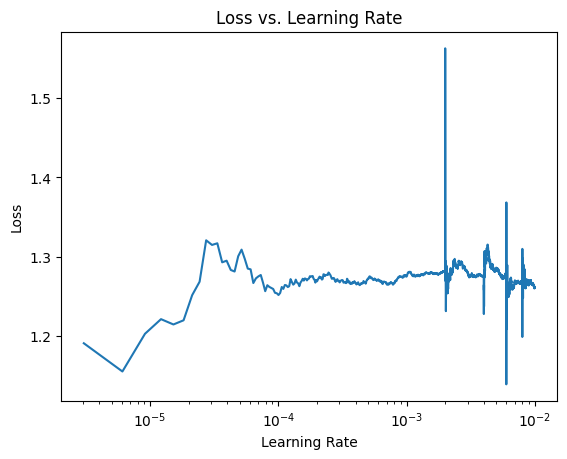

In [20]:
model.unfreeze(number_of_layers_to_unfreeze=10)
model.lr_find(train_generator, validation_generator, epochs=5)

In [22]:
model.unfreeze()
history6 = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path=model_dir, lr=[1e-4, 1e-3])
histories.append(history6)

All layers have been unfrozen.
Epoch 1/5
658/658 [==============================] - ETA: 0s - loss: 1.2699 - accuracy: 0.5149
Epoch 1: val_loss improved from inf to 0.96728, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 167s 254ms/step - loss: 1.2699 - accuracy: 0.5149 - val_loss: 0.9673 - val_accuracy: 0.6522
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


658/658 [==============================] - ETA: 0s - loss: 1.2686 - accuracy: 0.5166
Epoch 2: val_loss did not improve from 0.96728
658/658 [==============================] - 174s 264ms/step - loss: 1.2686 - accuracy: 0.5166 - val_loss: 0.9686 - val_accuracy: 0.6539
Epoch 3/5
658/658 [==============================] - ETA: 0s - loss: 1.2641 - accuracy: 0.5155
Epoch 3: val_loss improved from 0.96728 to 0.96588, saving model to ../../models/best_model_iteration_7_2.h5
658/658 [==============================] - 172s 261ms/step - loss: 1.2641 - accuracy: 0.5155 - val_loss: 0.9659 - val_accuracy: 0.6528
Epoch 4/5
658/658 [==============================] - ETA: 0s - loss: 1.2580 - accuracy: 0.5191
Epoch 4: val_loss did not improve from 0.96588
658/658 [==============================] - 169s 256ms/step - loss: 1.2580 - accuracy: 0.5191 - val_loss: 0.9682 - val_accuracy: 0.6516
Epoch 5/5
658/658 [==============================] - ETA: 0s - loss: 1.2581 - accuracy: 0.5194
Epoch 5: val_loss did 